# Analysis of expression of ALAS1 protein in respect to strain type

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Import Data

In [4]:
data = pd.read_csv('bgeee.csv')
data.head()

,Experiment ID,Library ID,Gene ID,Gene name,Expression level,Expression level unit,Read count,UMI count,Expression p-value,Anat. entity ID,Anat. entity name,Stage ID,Stage name,Sex,Strain,Species
0,GSE30611,ERX011182,ENSG00000023330,ALAS1,30.808488,TPM,3760.99945,0,5.92E-11,UBERON:0000082,adult mammalian kidney,HsapDv:0000154,60-year-old stage (human),female,White,Homo sapiens
1,GSE30611,ERX011183,ENSG00000023330,ALAS1,49.806236,TPM,6203.00120,0,<= 7.47e-17,UBERON:0000948,heart,HsapDv:0000171,77-year-old stage (human),male,White,Homo sapiens
2,GSE30611,ERX011184,ENSG00000023330,ALAS1,23.383742,TPM,2789.99800,0,6.08E-11,UBERON:0000992,ovary,HsapDv:0000141,47-year-old stage (human),female,Black or African American,Homo sapiens
3,GSE30611,ERX011185,ENSG00000023330,ALAS1,36.361474,TPM,2028.99636,0,5.19E-11,UBERON:0000468,multicellular organism,UBERON:0000104,life cycle,NaN,NaN,Homo sapiens
4,GSE30611,ERX011186,ENSG00000023330,ALAS1,39.504319,TPM,2870.99982,0,3.34E-12,UBERON:0000955,brain,HsapDv:0000171,77-year-old stage (human),female,White,Homo sapiens


# Check the columns and clear uneccesaary columns

In [5]:
data.columns

Index(['Experiment ID', 'Library ID', 'Gene ID', 'Gene name',
       'Expression level', 'Expression level unit', 'Read count', 'UMI count',
       'Expression p-value', 'Anat. entity ID', 'Anat. entity name',
       'Stage ID', 'Stage name', 'Sex', 'Strain', 'Species'],
      dtype='object')

In [6]:
df = data[[#'Experiment ID', 'Library ID', 'Gene ID', 
        'Gene name',
       'Expression level', 
       #'Expression level unit', 
       'Read count', 
       #'UMI count',
       #'Expression p-value', 'Anat. entity ID', 'Anat. entity name',
       #'Stage ID', 'Stage name', 'Sex', 
       'Strain', 
       #'Species'
       ]]
df.head()

,Gene name,Expression level,Read count,Strain
0,ALAS1,30.808488,3760.99945,White
1,ALAS1,49.806236,6203.00120,White
2,ALAS1,23.383742,2789.99800,Black or African American
3,ALAS1,36.361474,2028.99636,NaN
4,ALAS1,39.504319,2870.99982,White


# Create a new DataFrame(optional)

In [7]:
df_frame = pd.DataFrame(df)
df_frame.to_csv('df.csv', index=False)

# Check if there is null column

In [8]:
df_frame.isnull().sum()

Gene name             0
Expression level      0
Read count            0
Strain              458
dtype: int64

# Filling missing values

In [9]:
from sklearn.impute import SimpleImputer
imp_freq = SimpleImputer(strategy= 'most_frequent')
df_frame[['Strain']]= imp_freq.fit_transform(df[['Strain']])
df_frame.isnull().sum()


Gene name           0
Expression level    0
Read count          0
Strain              0
dtype: int64

In [10]:
df_frame.to_csv('dff.csv', index=False)

# Calculate the Basic Statistics

In [12]:
def anaylse_data(df_frame, Property):
    Expression= df_frame[Property]
    mean_expr = np.mean(Expression)
    median_expr = np.median(Expression)
    std_expr = np.std(Expression)
    min_expr = np.min(Expression)
    max_expr = np.max(Expression)


    print(f"\nAnalysis for {Property}:")
    print(f"Mean Expression: {mean_expr:.2f}")
    print(f"Median Expression: {median_expr:.2f}")
    print(f"Standard Deviation: {std_expr:.2f}")
    print(f"Minimum Expression: {min_expr}")
    print(f"Maximum Expression: {max_expr}")

# Anaylse each Property

In [16]:


anaylse_data(df_frame,'Expression level')


Analysis for Expression level:
Mean Expression: 43.04
Median Expression: 29.37
Standard Deviation: 67.08
Minimum Expression: 0.143516
Maximum Expression: 835.14796


# Visualize Expression and Read count

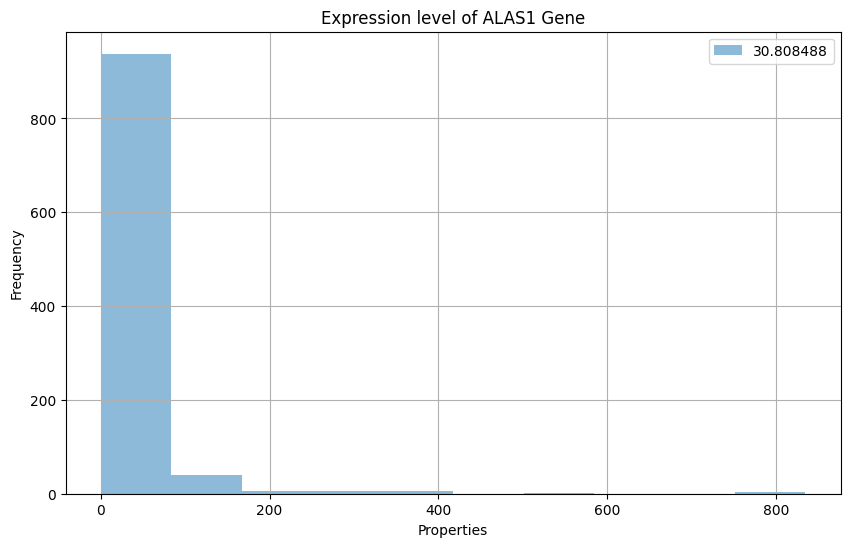

In [17]:
plt.figure(figsize=(10, 6))

plt.hist(df['Expression level'], bins=10, alpha=0.5, label=Property)
plt.title('Expression level of ALAS1 Gene')
plt.xlabel('Properties')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('expression_level.png')
plt.show()


c:\Users\hisript\first_mini_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


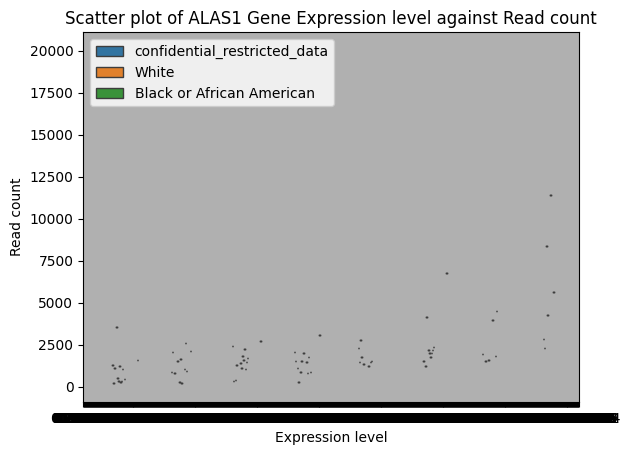

In [18]:
import seaborn as sns

sns.boxplot(df, x='Expression level', y='Read count', hue='Strain')
plt.title('Scatter plot of ALAS1 Gene Expression level against Read count')
plt.xlabel('Expression level')
plt.ylabel('Read count')
plt.legend()
plt.grid(True)
plt.savefig('scatterplot_expression_level.png')
plt.show() 


# Calculate Average level and identiy the strain with highest level of expression

In [20]:
df['Average_level']= df['Expression level'].mean()
Highest_expression_level= df.loc[df['Average_level'].idxmax()]
print("\nStrain with highest level of expression")
print(f"Strain: {Highest_expression_level['Strain']}, Average_level:{Highest_expression_level['Average_level']:.2f}")


Strain with highest level of expression
Strain: White, Average_level:43.04


C:\Users\hisript\AppData\Local\Temp\ipykernel_15284\3887373718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_level']= df['Expression level'].mean()
